In [1]:
import os #To import| library

In [2]:
PATH = os.getcwd() #Get current work directory


In [3]:
PATH

'C:\\Users\\MoAly\\Development\\LearningCurve\\Stage One'

In [4]:
DATAPATH = PATH + '\\Data'

SCRIPTPATH = PATH + '\\script'


try:
    os.mkdir(DATAPATH)
except FileExistsError:
    pass


In [5]:
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import psutil

except:
    %pip install pandas
    %pip install numpy
    %pip install seaborn
    %pip install matplotlib
    %pip install psutil

    import pandas as pd
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import psutil


In [6]:
def get_process_directory(pid):
    try:
        
        process = psutil.Process(pid)
        
        executable_path = process.exe()
        return executable_path
    except psutil.NoSuchProcess:
        return 0
    except Exception as e:
        return 0

In [7]:
PROCESS_NUM_TARGETED = 1000000


if os.path.isfile(PATH + '\\Data' + '\\process.csv'):
    data = pd.read_csv(PATH + '\\Data' + '\\process.csv')
    dataframe = data

else:
    data = {
        'ID': [id for id in range (PROCESS_NUM_TARGETED)],
        'Execution Path' : [get_process_directory(pid) for pid in range(PROCESS_NUM_TARGETED)]    
    }
    dataframe = pd.DataFrame(data)




In [8]:
dataframe.head() #Show the first 5 rows

,ID,Execution Path
0,0,0
1,1,0
2,2,0
3,3,0
4,4,


In [9]:
set(dataframe['Execution Path']) #To check if there is pathes that is been extracted.

{'',
 0,
 'C:\\Program Files (x86)\\Adobe\\Adobe Sync\\CoreSync\\CoreSync.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\ARM\\1.0\\armsvc.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\ADS\\Adobe Crash Processor.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\ADS\\Adobe Desktop Service.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\ElevationManager\\AdobeUpdateService.exe',
 'C:\\Program Files (x86)\\Common Files\\Adobe\\Adobe Desktop Common\\IPCBox\\AdobeIPCBroker.exe',
 'C:\\Program Files (x86)\\Dell\\UpdateService\\DCF\\Dell.DCF.UA.Bradbury.API.SubAgent.exe',
 'C:\\Program Files (x86)\\Dell\\UpdateService\\ServiceShell.exe',
 'C:\\Program Files (x86)\\Microsoft\\EdgeWebView\\Application\\120.0.2210.144\\msedgewebview2.exe',
 'C:\\Program Files (x86)\\Microsoft\\Edge\\Application\\msedge.exe',
 'C:\\Program Files (x86)\\NVIDIA Corporation\\NvNode\\NVIDIA Web Helper.exe',
 'C:\\Program Files\\

In [10]:
def labeling_Program_Files_process(data):
    pathes = list(data['Execution Path'])
    labels = []

    for path in pathes:
        if path is int:
            labels.append(0)
        elif 'program files' in str(path).lower():
            labels.append(1)
        else:
            labels.append(0)



    
    return labels



In [11]:
program_file_process = labeling_Program_Files_process(data)

In [12]:
set(program_file_process)


{0, 1}

In [13]:
dataframe['Program File Process'] = program_file_process

In [14]:
dataframe.head()

,ID,Execution Path,Program File Process
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,,0


In [15]:
set(dataframe['Program File Process'])

{0, 1}

In [16]:
def data_cleaning(data = dataframe):

    data = data[data['Execution Path'] != 0]

    data = data[data['Execution Path'] != '0']
    data = data[data['Execution Path'] != '']

    data = data.dropna()


    return data

In [17]:
cleaned_data = data_cleaning(dataframe)

In [18]:
cleaned_data


,ID,Execution Path,Program File Process
208,208,Registry,0
764,764,C:\Windows\System32\smss.exe,0
788,788,C:\Windows\System32\csrss.exe,0
820,820,C:\Windows\System32\svchost.exe,0
844,844,C:\Program Files\WindowsApps\microsoftwindows....,1
...,...,...,...
30920,30920,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1
30921,30921,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1
30922,30922,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1
30923,30923,C:\Program Files (x86)\Microsoft\EdgeWebView\A...,1


In [19]:
cleaned_data.to_csv(DATAPATH + '//process.csv')

In [20]:
np.array(cleaned_data['Program File Process']).sum() #Total of python Process that is been run

429

In [21]:
encoded_data = cleaned_data

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
enc = LabelEncoder()

In [24]:
pathes = pd.DataFrame(cleaned_data['Execution Path'])

In [25]:
encoded_data['Execution Path'] = enc.fit_transform(pathes)

C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
encoded_data.head()

,ID,Execution Path,Program File Process
208,208,135,0
764,764,118,0
788,788,100,0
820,820,120,0
844,844,58,1


In [27]:
cleaned_data.head()

,ID,Execution Path,Program File Process
208,208,135,0
764,764,118,0
788,788,100,0
820,820,120,0
844,844,58,1


In [28]:
enc.inverse_transform([57]) 

array(['C:\\Program Files\\WindowsApps\\microsoftwindows.client.webexperience_424.400.20.0_x64__cw5n1h2txyewy\\Dashboard\\WidgetService.exe'],
      dtype=object)

In [29]:
import matplotlib.pyplot as plt


In [30]:
x_axis = ['Not Program File Process', 'Program File Process']
x_axis

['Not Program File Process', 'Program File Process']

In [31]:
num_of_pf_process = np.array(cleaned_data['Program File Process']).sum()
total_num_of_proces = len(cleaned_data['Program File Process'])
y_axis = [(total_num_of_proces - num_of_pf_process), num_of_pf_process]

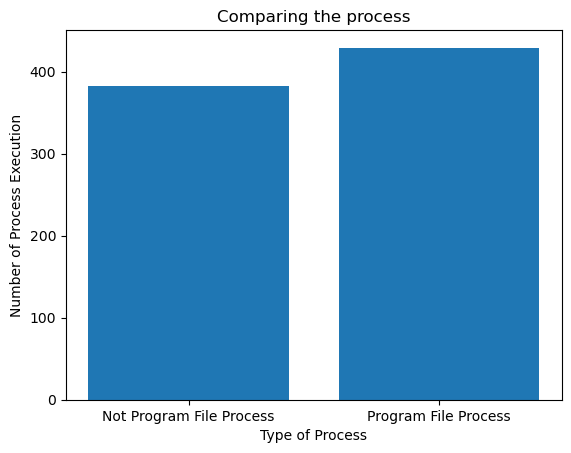

In [32]:
plt.bar(x_axis,y_axis)
plt.xlabel("Type of Process")
plt.ylabel('Number of Process Execution')
plt.title("Comparing the process")
plt.show()

In [33]:
cleaned_data.head()

,ID,Execution Path,Program File Process
208,208,135,0
764,764,118,0
788,788,100,0
820,820,120,0
844,844,58,1


In [34]:
set(encoded_data['Program File Process'])

{0, 1}

In [35]:
X = encoded_data['Execution Path']
y = encoded_data['Program File Process']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [38]:
from scripts.gradiant_decent import GradiantDecent as gd

In [39]:
iterations = 1000
model = gd.create_model(X_train, y_train, iteration=iterations, resolution=0.01)


In [40]:
model

(0.5336076817537667,
 9.605857775873972e-14,
 -1.0494036195574097e-13,
 [232032.2275632373,
  231327.8900499314,
  230624.62318024694,
  229922.42695418381,
  229221.30137174213,
  228521.24643292182,
  227822.26213772298,
  227124.3484861455,
  226427.50547818939,
  225731.73311385472,
  225037.03139314146,
  224343.40031604952,
  223650.83988257908,
  222959.35009272996,
  222268.93094650225,
  221579.58244389598,
  220891.30458491103,
  220204.09736954758,
  219517.96079780543,
  218832.8948696848,
  218148.89958518549,
  217465.97494430756,
  216784.12094705107,
  216103.33759341596,
  215423.62488340228,
  214744.98281700996,
  214067.411394239,
  213390.9106150895,
  212715.4804795614,
  212041.12098765472,
  211367.8321393694,
  210695.6139347055,
  210024.46637366305,
  209354.38945624192,
  208685.38318244222,
  208017.4475522639,
  207350.58256570695,
  206684.7882227714,
  206020.06452345735,
  205356.4114677646,
  204693.8290556933,
  204032.31728724335,
  203371.8761624148

In [41]:
len(model[3])

1000

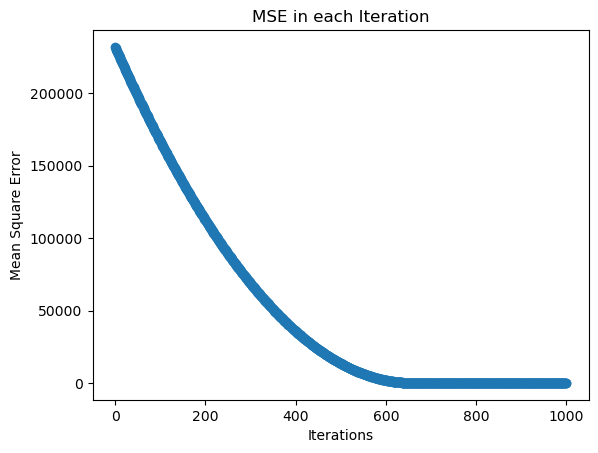

In [59]:
plt.scatter(y = model[3], x = [i for i in range(len(model[3]))])
plt.ylabel('Mean Square Error')
plt.xlabel("Iterations")
plt.title("MSE in each Iteration")
plt.show()

In [60]:
def prediction(path, model =  model): #Just for test the model

    threashold = 0.5


    path_tokenized = enc.transform([path])

    reasult = gd.predict(model[1],model[2],path_tokenized)
    if reasult >= threashold:
        output = 1
    else:
        output = 0

    return output


In [61]:
temp = []

for path in X_test:
    try:
        path = enc.inverse_transform([path]) 
        pred = prediction(path)
        temp.append(pred)
    except Exception as e:
        path = enc.inverse_transform([path]) 
        print(f"Error processing path {path}: {e}")
        temp.append(None)  # or some default value


C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-

In [62]:
y_pred = pd.DataFrame(temp)

In [63]:
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
77,0
78,0
79,0
80,0


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [65]:
accuracy_score(y_pred.values.reshape(-1,1), y_test.values.reshape(-1,1))

0.5121951219512195

In [66]:
precision_score(y_pred.values.reshape(-1,1), y_test.values.reshape(-1,1))

0.0

In [50]:
recall_score(y_pred.values.reshape(-1,1), y_test.values.reshape(-1,1))

C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [68]:
clf = LogisticRegression()

In [69]:
X_train_reshaped = X_train.values.reshape(-1,1)
y_train_reshaped = y_train.values.reshape(-1,1)

In [70]:
clf.fit(X_train_reshaped,y_train_reshaped)

C:\Users\MoAly\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [71]:
y_pred = clf.predict(X_test.values.reshape(-1,1))

In [72]:
accuracy_score(y_pred,y_test.values.reshape(-1,1))

1.0

In [73]:
precision_score(y_pred,y_test.values.reshape(-1,1))

1.0

In [74]:
recall_score(y_pred,y_test.values.reshape(-1,1))

1.0